In [1]:
import opendatasets as od 
import pandas as pd
import numpy as np

# pyplot
from matplotlib import pyplot as plt

# classifier
from sklearn.tree import DecisionTreeClassifier

# model
from sklearn.model_selection import KFold

# metrics
from sklearn.metrics import accuracy_score

In [2]:

od.download("https://www.kaggle.com/datasets/mathchi/diabetes-data-set") 

Skipping, found downloaded files in "./diabetes-data-set" (use force=True to force download)


In [3]:
diabetes_data = pd.read_csv("diabetes-data-set/diabetes.csv")

In [4]:
diabetes_data.shape

(768, 9)

In [5]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
features = diabetes_data.iloc[:,:-1].values
labels = diabetes_data.iloc[:,-1].values

In [8]:
print(features.shape, labels.shape)

(768, 8) (768,)


In [9]:
print(features.shape[0])

768


In [10]:
def factors(n):
    return list(
        factor for i in range(1, int(n**0.5) + 1) if n % i == 0
        for factor in (i, n//i)
    )

In [11]:
print(sorted(factors(features.shape[0]))[1:-1])

[2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64, 96, 128, 192, 256, 384]


In [12]:
def crossvalidation(data):
    
    test_scores = []
    
    for train_index, test_index in data.split(features):
        # Split the data based on given indices
        x_train, x_test = features[train_index], features[test_index]
        y_train, y_test  = labels[train_index], labels[test_index]

        # We are using Decision Treee Classifier here. The depth is kept at 2
        dt2 = DecisionTreeClassifier(max_depth=2)

        # Train the classifier
        dt2.fit(x_train, y_train)

        # Find out the score for the trained classifier using test data
        current_score = dt2.score(x_test, y_test)

        # Append the test scores to the list
        test_scores.append(current_score)
        
    # Return mean of the scores
    return np.mean(test_scores)


In [13]:
results = pd.DataFrame(columns=['K','Accuracy'])

for i in sorted(factors(features.shape[0]))[1:-1]:
  kf = KFold(n_splits=i)
  res = crossvalidation(kf)
  # print ("For fold value of {i}, the average accuracy of test is {res}".format(i=i, res=res))
  results.loc[len(results)] = [i, res]


In [14]:
print("Accuracy of KFold based on K\n\n" + str(results))

Accuracy of KFold based on K

        K  Accuracy
0     2.0  0.746094
1     3.0  0.734375
2     4.0  0.729167
3     6.0  0.743490
4     8.0  0.753906
5    12.0  0.756510
6    16.0  0.752604
7    24.0  0.743490
8    32.0  0.747396
9    48.0  0.752604
10   64.0  0.761719
11   96.0  0.765625
12  128.0  0.764323
13  192.0  0.765625
14  256.0  0.772135
15  384.0  0.772135


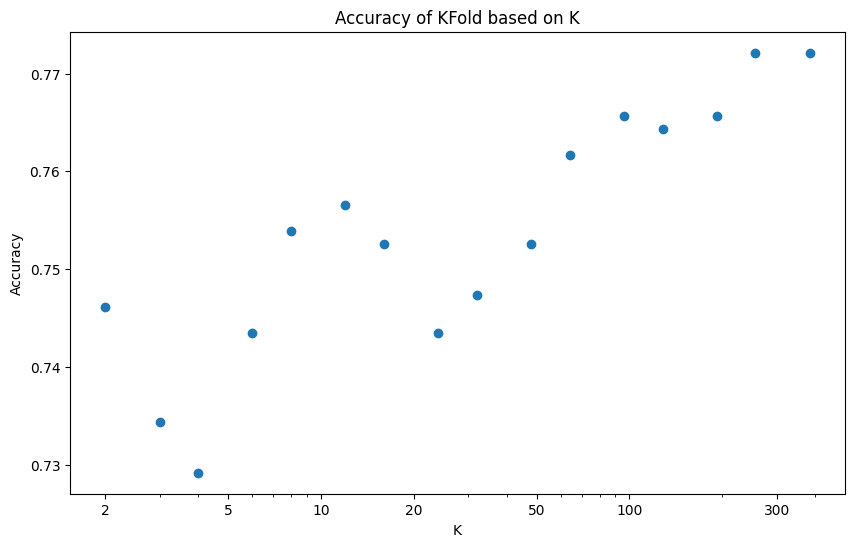

In [15]:
ticks = [2,5,10,20,50,100,300]
plt.figure(figsize=(10,6))
plt.title("Accuracy of KFold based on K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xscale("log")
plt.xticks(labels=ticks, ticks=ticks)
plt.scatter(results.iloc[:,0], results.iloc[:,1])
plt.show()